In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def one_hot_encode(y):
	N = len(y)
	K = len(set(y))

	Y = np.zeros((N,K))

	for i in range(N):
		Y[i,y[i]] = 1

	return Y


def accuracy(y, y_hat):
	return np.mean(y == y_hat)

In [3]:
def main():
	D = 2
	K = 3
	N = int(K*1e3)

	X0 = np.random.randn((N//K),D) + np.array([2,2])
	X1 = np.random.randn((N//K),D) + np.array([0,-2])
	X2 = np.random.randn((N//K),D) + np.array([-2,2])
	X_train = np.vstack((X0,X1,X2)).astype(np.float32)

	y_train = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K)).astype(np.int32)

	Y_train = one_hot_encode(y_train).astype(np.int32)

	plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
	plt.show()


	X = tf.placeholder(tf.float32, shape = (None,D), name = "X")
	Y = tf.placeholder(tf.int32, shape = (None,K), name = "Y")


	M1 = 4
	M2 = 4

	W1_0 = np.random.randn(D,M1)*np.sqrt(2/D)
	b1_0 = np.random.randn(M1)
	W2_0 = np.random.randn(M1,M2)*np.sqrt(2/M1)
	b2_0 = np.random.randn(M2)
	W3_0 = np.random.randn(M2,K)/np.sqrt(M2)
	b3_0 = np.random.randn(K)

	W1 = tf.Variable(W1_0.astype(np.float32), "W1")
	b1 = tf.Variable(b1_0.astype(np.float32), "b1")
	W2 = tf.Variable(W2_0.astype(np.float32), "W2")
	b2 = tf.Variable(b2_0.astype(np.float32), "b2")
	W3 = tf.Variable(W3_0.astype(np.float32), "W3")
	b3 = tf.Variable(b3_0.astype(np.float32), "b3")


	Z1 = tf.nn.relu(tf.matmul(X,W1) + b1)
	Z2 = tf.nn.relu(tf.matmul(Z1,W2) + b2)
	H3 = tf.matmul(Z2,W3) + b3

	cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels = Y, logits = H3))

	eta =1e-4
	train_op = tf.train.RMSPropOptimizer(eta, decay = 0.999, momentum = 0.9).minimize(cross_entropy)

	pred_op = tf.argmax(H3, axis = 1)


	init = tf.global_variables_initializer()


	J = []
	epochs = int(5e3)

	with tf.Session() as sess:
		sess.run(init)

		for epoch in range(epochs):
			sess.run(train_op, feed_dict = {X: X_train, Y: Y_train})
			J.append(sess.run(cross_entropy, feed_dict = {X: X_train, Y: Y_train}))

		y_hat_train = sess.run(pred_op, feed_dict = {X: X_train})


	print("Accuracy: {}".format(accuracy(y_train, y_hat_train)))

	plt.plot(J)
	plt.show()

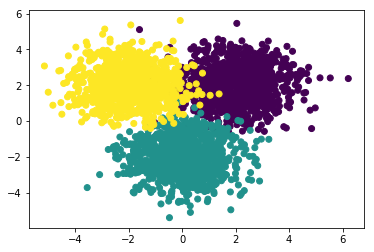

In [ ]:
if __name__ == "__main__":
	main()